In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
train['TimeStamp'] = pd.to_datetime(train.TimeStamp)
Year = train.TimeStamp.dt.year
Month = train.TimeStamp.dt.month
Week = train.TimeStamp.dt.weekday
Date = train.TimeStamp.dt.day
Hour = train.TimeStamp.dt.hour

train["Year"] = Year
train["Month"] = Month
train["WeekDay"] = Week
train["Date"] = Date
train["Hour"] = Hour


test = pd.read_csv('TestFileTemplate.csv')
test['TimeStamp'] = pd.to_datetime(train.TimeStamp)
Year1 = test.TimeStamp.dt.year
Month1 = train.TimeStamp.dt.month
Week1 = test.TimeStamp.dt.weekday
Date1 = test.TimeStamp.dt.day
Hour1 = test.TimeStamp.dt.hour


test["Year"] = Year1
test["Month"] = Month1
test["WeekDay"] = Week1
test["Date"] = Date1
test["Hour"] = Hour1

In [3]:
del train['TimeStamp']
del test['TimeStamp']

In [4]:
cols = train.columns.tolist()
cols = cols[-5:] + cols[:-5]
print(cols, len(cols))
train = train[cols]

['Year', 'Month', 'WeekDay', 'Date', 'Hour', 'StandardTemperature', 'Humidity', 'Wind', 'Ticket1', 'Ticket2'] 10


In [5]:
cols1 = test.columns.tolist()
cols1 = cols1[-5:] + cols1[:-5]
test = test[cols1]

In [6]:
train.head()

,Year,Month,WeekDay,Date,Hour,StandardTemperature,Humidity,Wind,Ticket1,Ticket2
0,2068,4,2,18,3,0.284836,47.75442,0.221554,1,3
1,2068,5,6,20,19,0.614588,48.72900,0.413520,108,233
2,2067,6,4,10,21,0.614588,28.26282,0.103405,52,197
3,2067,1,5,8,2,0.269797,77.96640,0.000000,6,28
4,2067,8,6,7,0,0.689581,53.60190,0.088661,34,81


In [7]:
test.head()

,Year,Month,WeekDay,Date,Hour,StandardTemperature,Humidity,Wind
0,2068,4,2,18,3,0.599649,71.14434,0.000000
1,2068,5,6,20,19,0.509716,80.89014,0.000000
2,2067,6,4,10,21,0.569671,80.89014,0.088661
3,2067,1,5,8,2,0.389707,26.31366,0.354446
4,2067,8,6,7,0,0.479640,57.50022,0.280628


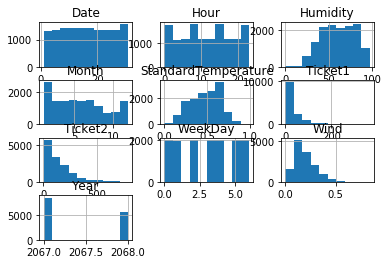

In [8]:
#train.info()
#train.describe()
#train.corr(method='pearson')
#train.skew()
#train.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False)
#plt.show()
#train.plot(kind='density', subplots=True, layout=(10,10), sharex=False)
#plt.show()
train.hist()
plt.show()

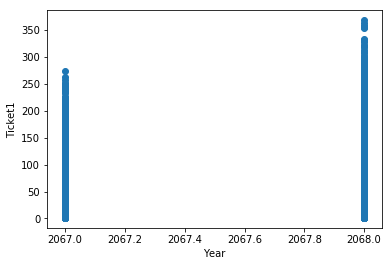

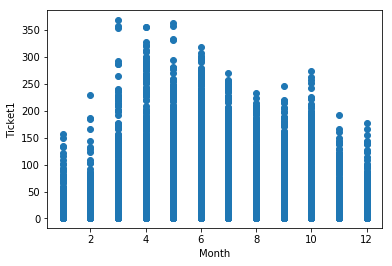

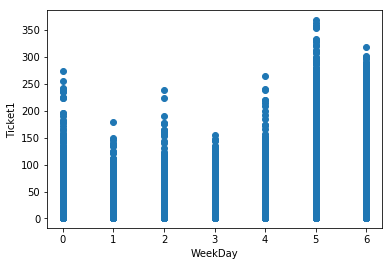

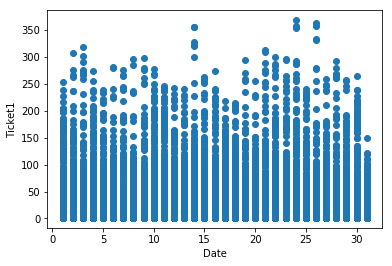

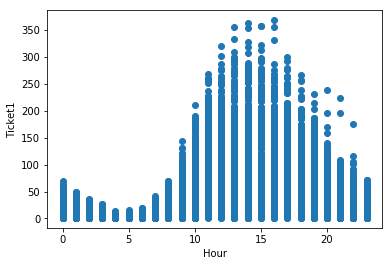

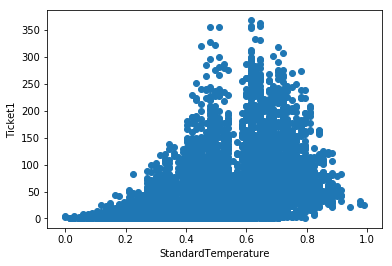

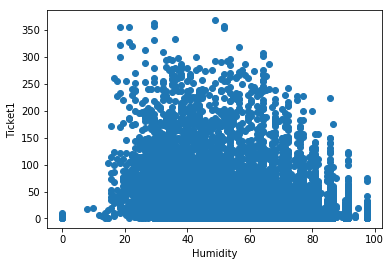

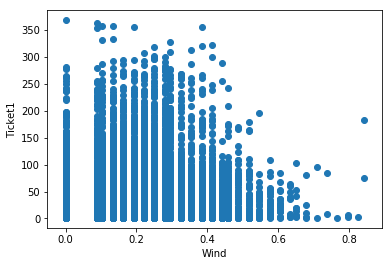

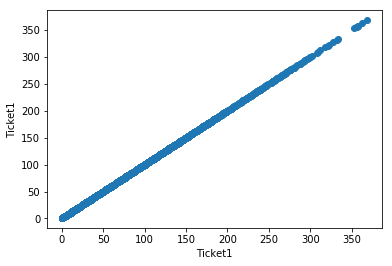

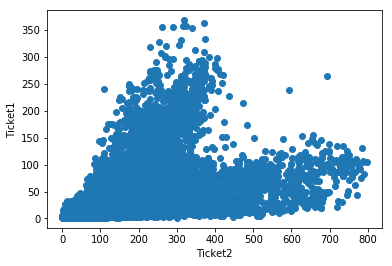

In [9]:

import matplotlib.pyplot as plt
for x in train.columns:
    plt.scatter(x=train[x], y = train["Ticket1"])
    plt.xlabel(x)
    plt.ylabel("Ticket1")
    plt.show()

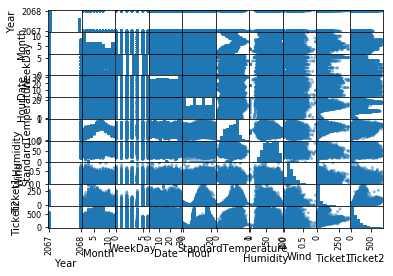

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(train)
plt.show()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


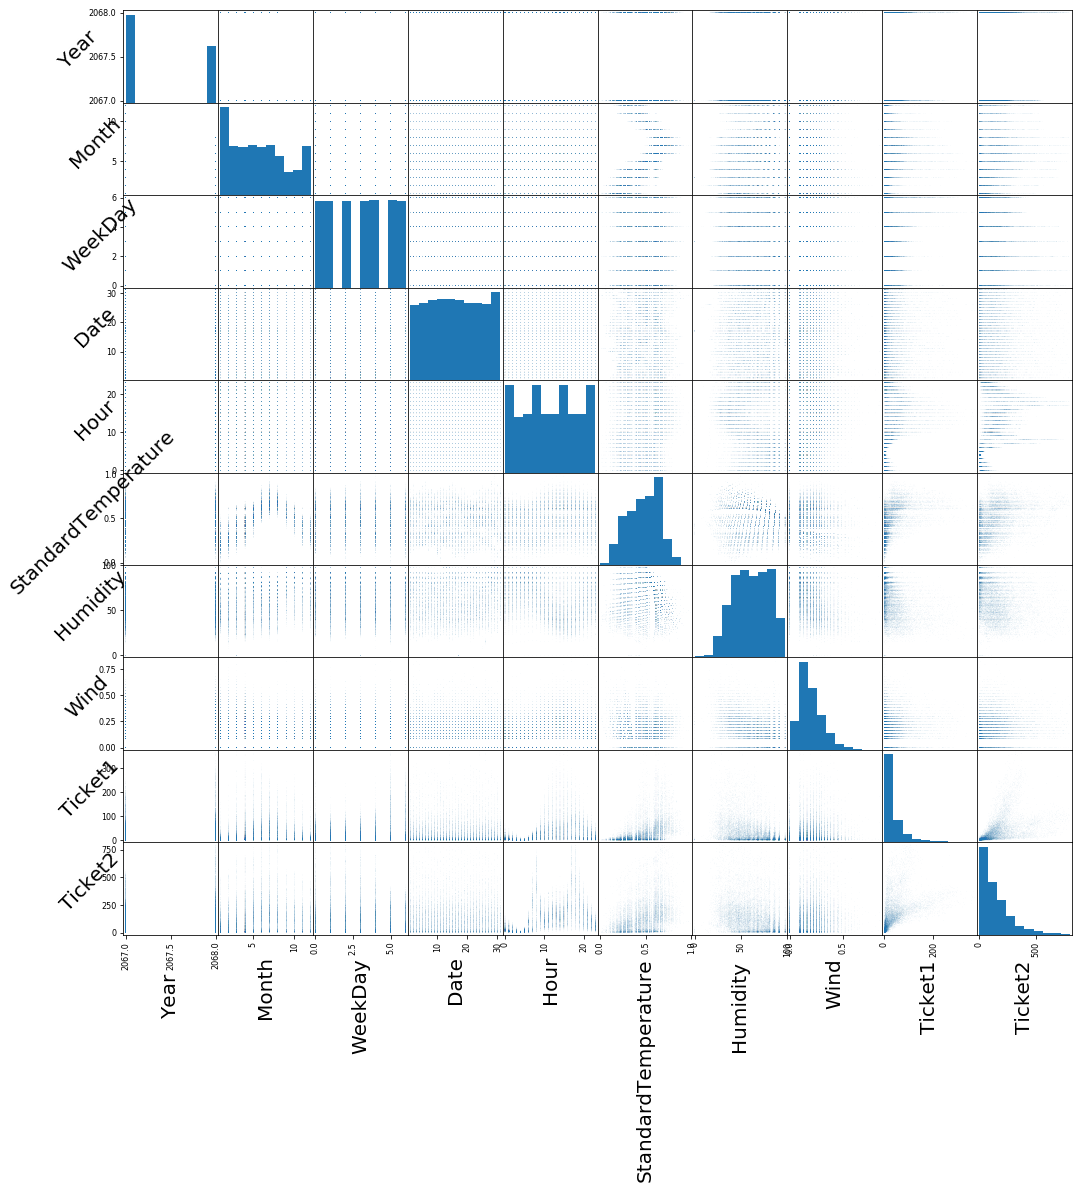

In [11]:
scatter_matrix = pd.scatter_matrix(
    train,
    figsize  = [17, 17],
    marker   = ".",
    s        = 0.2,
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 45)

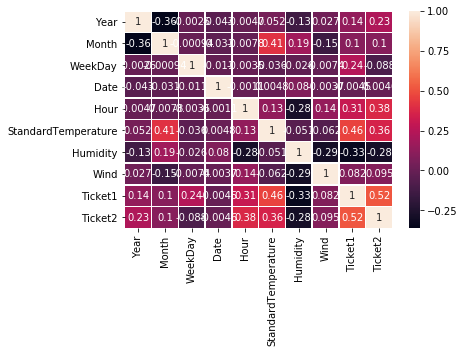

In [12]:
#corrolarion matrix
sns.heatmap(train[:].corr(), annot=True, linewidths=0.5)

In [13]:
print(train.iloc[:, 0:8].columns)

Index(['Year', 'Month', 'WeekDay', 'Date', 'Hour', 'StandardTemperature',
       'Humidity', 'Wind'],
      dtype='object')


In [14]:
X_train = train.iloc[:, 0:8].values
Y_train = train.iloc[:, 8:10].values
Y_train1 = train.iloc[:, 8:9].values
Y_train2 = train.iloc[:, 9:10].values
#X_test = test.iloc[:].values

In [15]:
np.unique(Y_train1, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [16]:
len(Y_train1)

14000

In [17]:
# Multi Linear Regression for Ticket
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, Y_train, cv=10,scoring='neg_mean_squared_error')
print(scores)
print(scores.mean(), scores.std())

[-7054.76142631 -7530.90369456 -6675.11918529 -6795.48316521
 -7528.61130856 -7018.42979986 -6750.02247867 -7173.23384184
 -7419.7221126  -6956.54579005]
-7090.283280294733 300.1740724220768


In [23]:
Y_test = lm.predict(X_test)
Y_test

NameError: name 'X_test' is not defined

In [24]:
print('Coefficient: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficient: 
 [[ 8.80207090e+00  1.44141662e-01  5.96248650e+00  1.10157080e-01
   1.24210706e+00  1.15812666e+02 -5.95893177e-01  4.90529387e+00]
 [ 6.66606487e+01  5.38902871e+00 -5.62267859e+00  3.48340201e-01
   5.97222503e+00  1.95207838e+02 -1.26953176e+00  3.09806427e+01]]
Intercept: 
 [ -18216.67111302 -137781.5142351 ]


In [25]:
regressor.score(X_train, Y_train)

NameError: name 'regressor' is not defined

In [26]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
sm=sm.OLS()
result = sm.OLS(Y_train1, X1).fit()
result.summary()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(result, X1, Y_train1, cv=10, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean(), scores.std())

NameError: name 'result' is not defined

In [ ]:
X2 = sm.add_constant(X_train)
result = sm.OLS(Y_train2, X1).fit()
result.summary()

In [ ]:
# Backward elimination
#import statsmodels.formula.api as sm
#X_train = np.append(arr = np.ones((14000, 1)).astype(int), values = X_train, axis = 1)
#X_opt = X_train[:, [0, 1, 2, 3, 4, 5, 6, 7]]
#regressor_OLS = sm.OLS(endog = Y_train, exog = X_train).fit()
#regressor_OLS.summary()

In [30]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[:, 5:6], Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
scores = cross_val_score(lin_reg, X_train[:, 5:6], Y_train, cv=10,scoring='neg_mean_squared_error')
scores.mean()

-9200.69203518055

In [33]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
scores = cross_val_score(lin_reg, X_poly, Y_train, cv=10,scoring='neg_mean_squared_error')
scores.mean()

-5656.129043929978

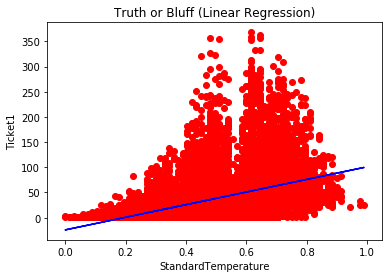

In [35]:
# Visualising the Linear Regression results
plt.scatter(X_train[:, 5:6], Y_train1, color = 'red')
plt.plot(X_train[:, 5:6], lin_reg.predict(X_train[:, 5:6]), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('StandardTemperature')
plt.ylabel('Ticket1')
plt.show()

ValueError: shapes (10,3) and (45,1) not aligned: 3 (dim 1) != 45 (dim 0)

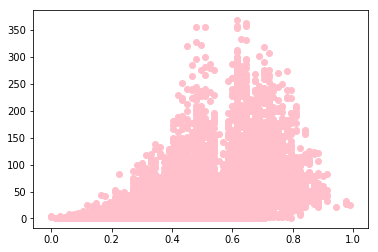

In [45]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train[:, 5:6]), max(X_train[:, 5:6]), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train[:, 5:6], Y_train1, color = 'pink')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('StandardTemperature')
plt.ylabel('Ticket1')
plt.show()

In [ ]:
#lin_reg.predict(X_test)


In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y1 = sc_y.fit_transform(Y_train1)
y = sc_y.fit_transform(Y_train)
y2 = sc_y.fit_transform(Y_train2)
#print(len(y),len(X[:,1]))


/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: Data

In [39]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#regressor.fit(X, y)

In [41]:
#SVR for x1
scores = cross_val_score(regressor, X, y1, cv=10,scoring='neg_mean_squared_error')
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector 

-0.22986591398689876

In [42]:
#SVR for x2
scores = cross_val_score(regressor, X, y2, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector 

0.4875139223245215

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train1)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test)
y_pred1

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train2)

# Predicting the Test set results
y_pred2 = classifier.predict(X_test)
y_pred2

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train1)

# Predicting the Test set results
Y_pred1 = classifier.predict(X_test)
Y_pred1

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train2)

# Predicting the Test set results
Y_pred2 = classifier.predict(X_test)
Y_pred2

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train1)

# Predicting the Test set results
Y_pred1 = classifier.predict(X_test)
Y_pred1

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train2)

# Predicting the Test set results
Y_pred2 = classifier.predict(X_test)
Y_pred2

In [68]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train1)

# Predicting the Test set results
Y_pred1 = classifier.predict(X_test)
Y_pred1

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  1, 227,  32,   1,   1,  12,   1, 255, 136,   4,   1,   2,   4,
        12,   1, 127,   1,   1, 234, 227,   1,  28,   1,  45, 127, 275,
       227,   2,   1,   1,  28,   1,   1,   1,   1, 164, 239,   2,   1,
       127,  12,  67, 199, 239,   1,   1,   2,   2,   1,   2,   1,   2,
         1,   1,   3, 127,   1,   2, 127,   1,  28, 200,   1,   1,   1,
         4,   1,  15, 252,  32,   4,   1,   1,   1,   1, 227, 230,   4,
         2,   1,   4,   4,   1, 243,  16, 234,   9, 127,  67,   1,   1,
         1,  20,   2, 127,  43, 127,   1,  28])

In [70]:
#NBfor x1
scores = cross_val_score(classifier, X_train,Y_train1, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array

0.09775544301160179

In [71]:
# NB for x1
scores = cross_val_score(classifier, X_train,Y_train2, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array

0.01354439165282377

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train2)

# Predicting the Test set results
Y_pred2 = classifier.predict(X_test)
Y_pred2

In [72]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([[  4.,   9.],
       [ 55., 192.],
       [ 38., 115.],
       [  4.,  10.],
       [ 61.,  74.],
       [ 23., 106.],
       [ 10.,  39.],
       [ 49., 187.],
       [ 34., 102.],
       [ 33., 392.],
       [ 21., 438.],
       [ 20.,  72.],
       [ 14., 134.],
       [ 16.,  80.],
       [  8.,  15.],
       [ 58., 160.],
       [  1.,   4.],
       [  4.,  25.],
       [ 62., 581.],
       [160., 228.],
       [ 34.,  68.],
       [ 70., 268.],
       [ 59., 319.],
       [ 79., 254.],
       [111., 110.],
       [133., 245.],
       [ 34., 242.],
       [ 31.,  86.],
       [  5.,   4.],
       [  1.,   4.],
       [ 25., 139.],
       [ 14.,  69.],
       [  7., 139.],
       [  2.,  24.],
       [  3.,   5.],
       [ 45., 372.],
       [ 17., 133.],
       [ 10.,  12.],
       [  1.,   4.],
       [ 20., 105.],
       [ 31., 234.],
       [ 62., 399.],
       [ 74., 154.],
       [ 75., 152.],
       [  4.,  17.],
       [ 48., 616.],
       [  9., 236.],
       [ 45.,

In [74]:
scores = cross_val_score(classifier, X_train,Y_train1, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.09887019408147929

In [75]:
scores = cross_val_score(classifier, X_train,Y_train2, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.03165822296341615

In [76]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([[  1.,   7.],
       [ 54., 154.],
       [ 38., 115.],
       [  4.,  15.],
       [ 25.,  74.],
       [  4., 157.],
       [  8.,  40.],
       [ 38., 168.],
       [ 43., 133.],
       [ 18., 101.],
       [ 19., 187.],
       [ 20., 101.],
       [  3.,  83.],
       [  9., 101.],
       [  1.,  15.],
       [  6., 139.],
       [  1.,   4.],
       [  1.,   7.],
       [ 53., 187.],
       [148., 294.],
       [ 29., 535.],
       [ 28., 189.],
       [ 62., 291.],
       [ 20., 178.],
       [ 42., 114.],
       [ 28., 245.],
       [  9., 161.],
       [ 23.,  70.],
       [  1.,   5.],
       [  2.,   4.],
       [ 37., 179.],
       [ 35.,  65.],
       [ 51., 138.],
       [  1.,  31.],
       [  1.,   4.],
       [ 40., 334.],
       [  9., 133.],
       [  2.,   5.],
       [  1.,   2.],
       [ 19.,  45.],
       [ 31., 234.],
       [ 67., 459.],
       [ 74., 154.],
       [ 40., 151.],
       [  1.,  88.],
       [ 29., 603.],
       [ 17., 181.],
       [ 20.,

In [77]:
scores = cross_val_score(classifier, X_train,Y_train1, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataCo

0.11514334473817359

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=10)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
scores = cross_val_score(ridge_regressor, X_train,Y_train, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

0.33556350144909997

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=10)
lasso_regressor.fit(X_train, Y_train)

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
scores = cross_val_score(ridge_regressor, X_train,Y_train, cv=10)
scores.mean()

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitshete/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

0.33556350144909997